In [1]:
import sys
sys.path.append("/u/lukas.rilling/dev/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib widget

from returnn_training_progress import get_epoch_data
from returnn_training_plot_nb import plot_df
%load_ext autoreload
%autoreload 2

In [2]:
globs = [
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_ASR_conformer*_xvector/training"
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS_ASR_conformer_x_vector_spec_augment_ctc_scale_0.1/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS_ASR_conformer_x_vector_control_spec_augment/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS_ASR_conformer_x_vector_spec_augment_ctc_scale_0.1/training"
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS_*ddi_actnorm/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_ddi_actnorm/enc192/100ep/not_silence_preprocessed/training"
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_100ep*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_x*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glow_ASR_conformer*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/no_ddi/glow_ASR_conformer*/training",
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/no_ddi/glowTTS*/training",
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS*/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_ASR_conformer/training",
]
# globs = ["/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS_ASR*pass*/training"]
# lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_100ep_not_silence_preprocessed_speaker_drop_*/training"
# globs = ["/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS_x_vect*/training", "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS/training"]
lr_files = []
for g in globs:
    lr_files += glob.glob(g)

common_prefix = os.path.commonpath(lr_files)
common_sufix = os.path.commonpath([l[::-1] for l in lr_files])[::-1]

names = []
for f in lr_files:
    names.append(f.removeprefix(common_prefix).removesuffix(common_sufix))

files = dict(zip(lr_files, names))
files

{'/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/no_ddi/glowTTS_ASR_conformer_two_forward_pass/training': '/no_ddi/glowTTS_ASR_conformer_two_forward_pass/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_ASR_conformer_x_vector/training': '/ddi/glowTTS_ASR_conformer_x_vector/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS/training': '/ddi/glowTTS/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_x_vector/training': '/ddi/glowTTS_x_vector/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_ASR_conformer_two_forward_pass/training': '/ddi/glowTTS_ASR_conformer_two_forward_pass/',
 

In [3]:
# lr_files.append(
#     "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/no_glow/training"
# )
# files[lr_files[-1]] = "Baseline Conformer Only"

# lr_files.append(
#     "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed/training"
# )
# files[lr_files[-1]] = "Baseline"

lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS/enc192/100ep/not_silence_preprocessed/training"
)
files[lr_files[-1]] = "Baseline GlowTTS"

lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector/enc768/100ep/not_silence_preprocessed/training"
)
files[lr_files[-1]] = "Baseline GlowTTS x-vector"
lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_ddi_actnorm/enc192/100ep/not_silence_preprocessed/LR_scheduled/training/"
)
files[lr_files[-1]] = "Baseline GlowTTS ddi"

lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/weak_baseline/training"
)
files[lr_files[-1]] = "Baseline Weak Conformer"
lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/no_glow/training/"
)
files[lr_files[-1]] = "Baseline Conformer"


lr_files

['/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/no_ddi/glowTTS_ASR_conformer_two_forward_pass/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_ASR_conformer_x_vector/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_x_vector/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_ASR_conformer_two_forward_pass/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_100ep_pe1_radam1e-9/training',
 '/u/lukas.rilling/

In [4]:
partition_epochs = {
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS/enc192/100ep/not_silence_preprocessed/training": 1,
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector*/enc768/100ep/not_silence_preprocessed/training": 1,
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS_x_vector_pe*/training": 1,
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS/training": 1,
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_100ep*/training": 1,
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_ddi_actnorm/enc192/100ep/not_silence_preprocessed/LR_scheduled/training/": 1,
}

partition_epochs_2 = {}
for k, v in partition_epochs.items():
    new = {key: v for key in glob.glob(k)}
    partition_epochs_2 = {**partition_epochs_2, **new}

partition_epochs = partition_epochs_2
partition_epochs

{'/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS/enc192/100ep/not_silence_preprocessed/training': 1,
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v3/enc768/100ep/not_silence_preprocessed/training': 1,
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector/enc768/100ep/not_silence_preprocessed/training': 1,
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v3_norm_xvector/enc768/100ep/not_silence_preprocessed/training': 1,
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glowTTS_x_vector_pe1_radam_no_dec_dropout/training': 1,
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/gl

/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/no_ddi/glowTTS_ASR_conformer_two_forward_pass/training: 3
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_ASR_conformer_x_vector/training: 3
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS/training: 3
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_x_vector/training: 3
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_ASR_conformer_two_forward_pass/training: 3
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/conformer_coupling/ddi/glowTTS_100ep_pe1_radam1e-9/training: 1
/u/lukas.rilling/experime

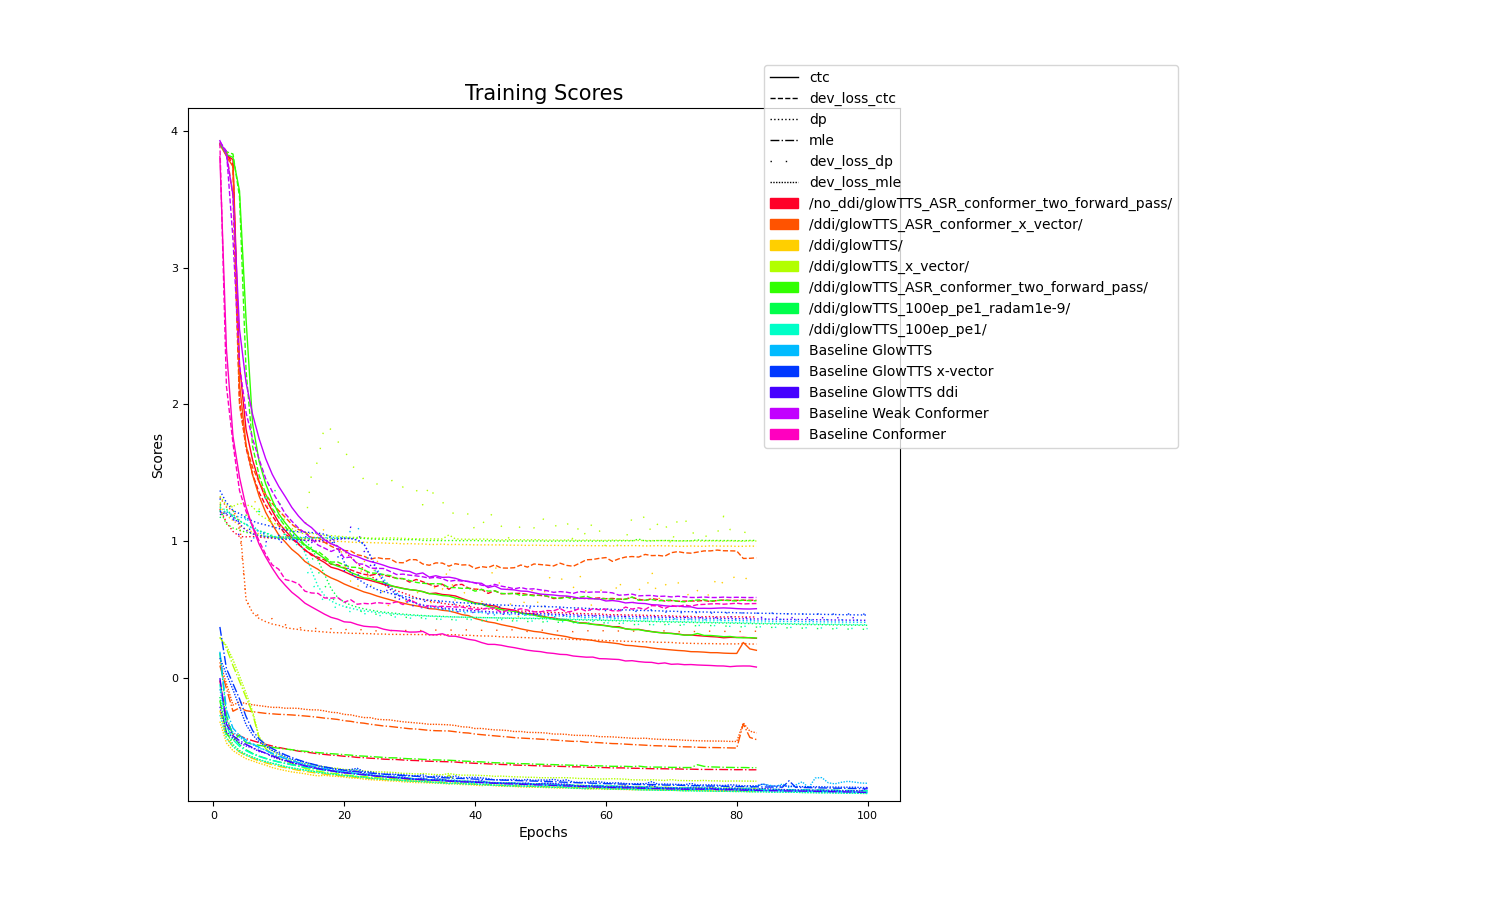

In [7]:
error_data = {}
labels = list(files.values())
for i, lr_file in enumerate(lr_files):
    data = get_epoch_data(lr_file, epoch=None)
    if data is None:
        continue
    p_e = 3 if lr_file not in partition_epochs else partition_epochs[lr_file]
    print(f"{lr_file}: {p_e}")
    for ep, ep_data in data.items():
        if ep % p_e == 0:
            ep_data_error = ep_data.pop("error", {})
            error_data[(labels[i], int(ep//p_e))] = ep_data
            error_data[(labels[i], int(ep//p_e))].update(ep_data_error)
df = pd.DataFrame.from_dict(error_data, orient="index")
plot_df(
    df,
    plot_lr=False,
    large_font=False,
    shrink_axes=0.6,
    # ylim_max=4,
    ylim_min=-0.9,
    keys_exclude="devtrain",
    # color_map="Set1"
)